In [1]:
# Import dependancies
import imageio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from os import path
from selenium import webdriver
from PIL import Image
from pathlib import Path
print(os.getcwd())

/Users/rogerwatts/Desktop/Classwork/FAO-Fertilizer-Data-Analysis


In [17]:
# Import agriculture land use data
ag_land_df = pd.read_csv("Inputs_LandUse_E_All_Data.csv")
filter_list =  ['Agriculture']
ag_land_df = land_df[land_df['Item'].isin(filter_list)]
ag_land_df

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
118,2,Afghanistan,6602,Agriculture,5110,Area,1961,1961,1000 ha,3.770000e+04,Fc
119,2,Afghanistan,6602,Agriculture,5110,Area,1962,1962,1000 ha,3.776000e+04,Fc
120,2,Afghanistan,6602,Agriculture,5110,Area,1963,1963,1000 ha,3.781000e+04,Fc
121,2,Afghanistan,6602,Agriculture,5110,Area,1964,1964,1000 ha,3.787300e+04,Fc
122,2,Afghanistan,6602,Agriculture,5110,Area,1965,1965,1000 ha,3.787500e+04,Fc
...,...,...,...,...,...,...,...,...,...,...,...
196620,5817,Net Food Importing Developing Countries,6602,Agriculture,5110,Area,2015,2015,1000 ha,1.150996e+06,A
196621,5817,Net Food Importing Developing Countries,6602,Agriculture,5110,Area,2016,2016,1000 ha,1.154045e+06,A
196622,5817,Net Food Importing Developing Countries,6602,Agriculture,5110,Area,2017,2017,1000 ha,1.155516e+06,A
196623,5817,Net Food Importing Developing Countries,6602,Agriculture,5110,Area,2018,2018,1000 ha,1.155730e+06,A


In [18]:
# Create df containing country area data
land_df = pd.read_csv("Inputs_LandUse_E_All_Data.csv")
filter_list =  ['Country area']
land_df = land_df[land_df['Item'].isin(filter_list)]
land_df

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,6.528600e+04,W
1,2,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,6.528600e+04,W
2,2,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,6.528600e+04,W
3,2,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,6.528600e+04,W
4,2,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,6.528600e+04,W
...,...,...,...,...,...,...,...,...,...,...,...
196502,5817,Net Food Importing Developing Countries,6600,Country area,5110,Area,2015,2015,1000 ha,3.003439e+06,A
196503,5817,Net Food Importing Developing Countries,6600,Country area,5110,Area,2016,2016,1000 ha,3.003439e+06,A
196504,5817,Net Food Importing Developing Countries,6600,Country area,5110,Area,2017,2017,1000 ha,3.003473e+06,A
196505,5817,Net Food Importing Developing Countries,6600,Country area,5110,Area,2018,2018,1000 ha,3.003432e+06,A


In [23]:
# Merge dataframes to produce columns containing country data for each year
total_land_df = pd.merge(left=ag_land_df, right=land_df, on=['Area', 'Year'])
total_land_df

,Area Code_x,Area,Item Code_x,Item_x,Element Code_x,Element_x,Year Code_x,Year,Unit_x,Value_x,Flag_x,Area Code_y,Item Code_y,Item_y,Element Code_y,Element_y,Year Code_y,Unit_y,Value_y,Flag_y
0,2,Afghanistan,6602,Agriculture,5110,Area,1961,1961,1000 ha,3.770000e+04,Fc,2,6600,Country area,5110,Area,1961,1000 ha,6.528600e+04,W
1,2,Afghanistan,6602,Agriculture,5110,Area,1962,1962,1000 ha,3.776000e+04,Fc,2,6600,Country area,5110,Area,1962,1000 ha,6.528600e+04,W
2,2,Afghanistan,6602,Agriculture,5110,Area,1963,1963,1000 ha,3.781000e+04,Fc,2,6600,Country area,5110,Area,1963,1000 ha,6.528600e+04,W
3,2,Afghanistan,6602,Agriculture,5110,Area,1964,1964,1000 ha,3.787300e+04,Fc,2,6600,Country area,5110,Area,1964,1000 ha,6.528600e+04,W
4,2,Afghanistan,6602,Agriculture,5110,Area,1965,1965,1000 ha,3.787500e+04,Fc,2,6600,Country area,5110,Area,1965,1000 ha,6.528600e+04,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14625,5817,Net Food Importing Developing Countries,6602,Agriculture,5110,Area,2015,2015,1000 ha,1.150996e+06,A,5817,6600,Country area,5110,Area,2015,1000 ha,3.003439e+06,A
14626,5817,Net Food Importing Developing Countries,6602,Agriculture,5110,Area,2016,2016,1000 ha,1.154045e+06,A,5817,6600,Country area,5110,Area,2016,1000 ha,3.003439e+06,A
14627,5817,Net Food Importing Developing Countries,6602,Agriculture,5110,Area,2017,2017,1000 ha,1.155516e+06,A,5817,6600,Country area,5110,Area,2017,1000 ha,3.003473e+06,A
14628,5817,Net Food Importing Developing Countries,6602,Agriculture,5110,Area,2018,2018,1000 ha,1.155730e+06,A,5817,6600,Country area,5110,Area,2018,1000 ha,3.003432e+06,A


In [26]:
# Clean dataframe to contain only relevant columns
total_land_df.rename(columns = {'Value_x':'Agri_Land', 'Value_y':'Total_Land'}, inplace = True)
total_land_df.drop(total_land_df.columns.difference(['Area', 'Year', 'Unit_x', 'Agri_Land','Total_Land']), 1, inplace=True)
total_land_df

,Area,Year,Unit_x,Agri_Land,Total_Land
0,Afghanistan,1961,1000 ha,3.770000e+04,6.528600e+04
1,Afghanistan,1962,1000 ha,3.776000e+04,6.528600e+04
2,Afghanistan,1963,1000 ha,3.781000e+04,6.528600e+04
3,Afghanistan,1964,1000 ha,3.787300e+04,6.528600e+04
4,Afghanistan,1965,1000 ha,3.787500e+04,6.528600e+04
...,...,...,...,...,...
14625,Net Food Importing Developing Countries,2015,1000 ha,1.150996e+06,3.003439e+06
14626,Net Food Importing Developing Countries,2016,1000 ha,1.154045e+06,3.003439e+06
14627,Net Food Importing Developing Countries,2017,1000 ha,1.155516e+06,3.003473e+06
14628,Net Food Importing Developing Countries,2018,1000 ha,1.155730e+06,3.003432e+06


In [27]:
# Create column containing calculated % of agricultural land use for each country
total_land_df['Percent_Ag_Land'] = total_land_df['Agri_Land'] / total_land_df['Total_Land']
total_land_df
              

,Area,Year,Unit_x,Agri_Land,Total_Land,Percent_Ag_Land
0,Afghanistan,1961,1000 ha,3.770000e+04,6.528600e+04,0.577459
1,Afghanistan,1962,1000 ha,3.776000e+04,6.528600e+04,0.578378
2,Afghanistan,1963,1000 ha,3.781000e+04,6.528600e+04,0.579144
3,Afghanistan,1964,1000 ha,3.787300e+04,6.528600e+04,0.580109
4,Afghanistan,1965,1000 ha,3.787500e+04,6.528600e+04,0.580140
...,...,...,...,...,...,...
14625,Net Food Importing Developing Countries,2015,1000 ha,1.150996e+06,3.003439e+06,0.383226
14626,Net Food Importing Developing Countries,2016,1000 ha,1.154045e+06,3.003439e+06,0.384241
14627,Net Food Importing Developing Countries,2017,1000 ha,1.155516e+06,3.003473e+06,0.384726
14628,Net Food Importing Developing Countries,2018,1000 ha,1.155730e+06,3.003432e+06,0.384803


In [28]:
total_land_df['Percent_Ag_Land'].mean()


0.36024115274646823

In [29]:
# set the filepath and load in a shapefile
fp = os.path.join("World_Countries", "World_Countries.shp")
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."


<AxesSubplot:>

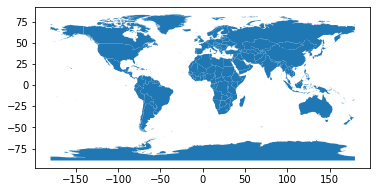

In [30]:
map_df.plot()

In [31]:
map_df["COUNTRY"].unique()

array(['American Samoa', 'United States Minor Outlying Islands',
       'Cook Islands', 'French Polynesia', 'Niue', 'Pitcairn', 'Samoa',
       'Tokelau', 'Tonga', 'Wallis and Futuna', 'El Salvador',
       'Guatemala', 'Mexico', 'Canada', 'Argentina', 'Falkland Islands',
       'Chile', 'Ecuador', 'Peru', 'Bolivia', 'Brazil', 'Paraguay',
       'Uruguay', 'South Georgia and South Sandwich Islands',
       'Antarctica', 'Fiji', 'Saint Helena', 'Anguilla',
       'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize',
       'Bermuda', 'Bonaire', 'British Virgin Islands', 'Cayman Islands',
       'Colombia', 'Costa Rica', 'Cuba', 'Curacao', 'Dominica',
       'Dominican Republic', 'French Guiana', 'Grenada', 'Guadeloupe',
       'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Martinique',
       'Montserrat', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saba',
       'Saint Barthelemy', 'Saint Eustatius', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Martin', 'Saint Pierre and Miq

In [32]:
fert_df['Area'].isin(map_df['COUNTRY']).value_counts()

True     10786
False     3844
Name: Area, dtype: int64

In [33]:
map_df['COUNTRY'].isin(fert_df['Area']).value_counts()

True     200
False     49
Name: COUNTRY, dtype: int64

In [34]:
fert_df['Area'] = fert_df['Area'].str.replace('United States of America', 'United States')
fert_df['Area'] = fert_df['Area'].str.replace('USSR', 'Russian Federation')

In [35]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("COUNTRY").join(fert_df.set_index("Area"))
merged.head()

,FID,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Area Code,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,6602.0,Agriculture,5110.0,Area,1961.0,1961.0,1000 ha,37700.0,Fc
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,6602.0,Agriculture,5110.0,Area,1962.0,1962.0,1000 ha,37760.0,Fc
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,6602.0,Agriculture,5110.0,Area,1963.0,1963.0,1000 ha,37810.0,Fc
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,6602.0,Agriculture,5110.0,Area,1964.0,1964.0,1000 ha,37873.0,Fc
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,6602.0,Agriculture,5110.0,Area,1965.0,1965.0,1000 ha,37875.0,Fc


In [37]:
# Get a list of years for data loops
from datetime import date

start = date(1961, 1, 1) 
end = date(2019, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]
print(year_range)

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [38]:
# set the min and max range for the choropleth map
vmin, vmax = 0, .75

In [39]:
# Loop year year to create image for Nitrogen fertilizer use
for year in year_range:
    df_new = merged.loc[((merged['Year'] == year)
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = df_new.plot(column='Percent_Ag_Land', cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # Remove axis
    fig.axis('off')
    
    # Create a title
    fig.set_title('Percent_Agricultural Land Use', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # Position year in bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    # Save image as jpg for gif creation
    filepath = os.path.join(str(year) + '_fert.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

SyntaxError: invalid syntax (<ipython-input-39-ec77e2a5053f>, line 5)

In [ ]:
# Convert jpg to png files for each map image
for year in year_range:
    im1 = Image.open(str(year) + '_fert.jpg')
    im1.save(str(year) + '_fert.png')
    os.remove(str(year) + '_fert.jpg')

In [ ]:
# Loop through png files and resize for better visualization
png_dir = os.getcwd()
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        image = Image.open(file_name)
        new_width  = 800
        new_height = 800
        image = image.resize((new_width, new_height), Image.ANTIALIAS)
        image.save(file_name)

In [ ]:
# Create Gif and remove each .png file
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        os.remove(file_path)
imageio.mimsave("MapGif_N.gif", images, fps=1)
